# Raport z analizy i modelowania wybranego zbioru danych
## Katarzyna Kowalska

In [1]:
# Ładowanie pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Dane pochodzą ze storny http://archive.ics.uci.edu/ml/datasets/Air+Quality

Citation:

S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005, https://www.sciencedirect.com/science/article/abs/pii/S0925400507007691?via%3Dihub

Zbiór danych zawiera odpowiedzi z zestawu 5 czujników gazowych tlenków metali wbudowanych w wieloczujnikowe urządzenie do pomiaru jakości powietrza. Średnia odpowiedź jest rejestrowana co godzinę wraz ze wzorcami stężeń gazów z certyfikowanego analizatora. Urządzenie zostało ulokowane na polu, na terenie znacznie zanieczyszczonym, na poziomie drogi w mieście we Włoszech. Dane rejestrowano od marca 2004r. do lutego 2005r. (jeden rok).

Celem niniejszego raportu jest próba odpowiedzenia na pytanie czy wilgotoność bezwzględna AH jest funkcją zmiennych dla zmiennych oznaczających koncentrację różnych gazów oraz czy jesteśmy w stanie i z jaką dokładnością określić wilgotność bezwzględną AH.

Informacje o zmiennych:

0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in Â°C
13. Relative Humidity (%)
14. AH Absolute Humidity 

In [2]:
# Informacje o zmiennych

# 0 Date (DD/MM/YYYY)
# 1 Time (HH.MM.SS)
# 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
# 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
# 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
# 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
# 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
# 7 True hourly averaged NOx concentration in ppb (reference analyzer)
# 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
# 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
# 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
# 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
# 12 Temperature in Â°C
# 13 Relative Humidity (%)
# 14 AH Absolute Humidity 

# Missing values are tagged with -200 value.

Note to Future Self: W celu ułatwienia pracy na kolumnach zmieniamy ich nazwy, like so

```col = ['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC','NOX_GT','PT08_S3_NOX','NO2_GT', 'PT08_S4_NO2','PT08_S5_O3','T','RH','AH']```

Wtedy można wywoływać kolumny za pomocą ```.``` (operatora wyłuskania), np: ```data_air_quality.NMHC_GT```.

Kate, you ```N00b```, do it ```BEFORE``` you start doing ```things```!

In [3]:
# Wczytanie danych

filename = "AirQualityUCI.csv"
data_air_quality = pd.read_csv(filename, sep = ';')
data_air_quality

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9466         NaN       NaN    NaN          NaN       NaN      NaN   
9467         NaN       NaN    NaN          NaN       NaN      NaN   
9468         NaN       NaN    NaN          NaN       NaN      NaN   
9469         NaN       NaN    NaN          NaN       NaN      NaN   
9470         NaN       NaN    NaN          NaN       NaN      NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16  
0          1268.0  13,6  48,9  0,7578          NaN          NaN  
1           972.0  13,3  47,7  0,7255          NaN          NaN  
2          1074.0  11,9  54,0  0,7502          NaN          NaN  
3          1203.0  11,0  60,0  0,7867          NaN          NaN  
4          1110.0  11,2  59,6  0,7888          NaN          NaN  
...           ...   ...   ...     ...          ...          ...  
9466          NaN   NaN   NaN     NaN          NaN          NaN  
9467          NaN   NaN   NaN     NaN          NaN          NaN  
9468          NaN   NaN   NaN     NaN          NaN          NaN  
9469          NaN   NaN   NaN     NaN          NaN          NaN  
9470          NaN   NaN   NaN     NaN          NaN          NaN  

[9471 rows x 17 columns]

Widzimy, że mamy 2 puste kolumny i kilka pustych rzędów danych. Usuwamy kolumny ```Unnamed: 15``` i ```Unnamed: 16``` i końcowe wiersze z wartościami ```NaN```

In [4]:
data_air_quality.drop(["Unnamed: 15", "Unnamed: 16"], axis = 1, inplace = True)
data_air_quality.dropna(how = 'all', inplace = True)
data_air_quality

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9352  04/04/2005  10.00.00    3,1       1314.0    -200.0     13,5   
9353  04/04/2005  11.00.00    2,4       1163.0    -200.0     11,4   
9354  04/04/2005  12.00.00    2,4       1142.0    -200.0     12,4   
9355  04/04/2005  13.00.00    2,1       1003.0    -200.0      9,5   
9356  04/04/2005  14.00.00    2,2       1071.0    -200.0     11,9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13,6  48,9  0,7578  
1           972.0  13,3  47,7  0,7255  
2          1074.0  11,9  54,0  0,7502  
3          1203.0  11,0  60,0  0,7867  
4          1110.0  11,2  59,6  0,7888  
...           ...   ...   ...     ...  
9352       1729.0  21,9  29,3  0,7568  
9353       1269.0  24,3  23,7  0,7119  
9354       1092.0  26,9  18,3  0,6406  
9355        770.0  28,3  13,5  0,5139  
9356        816.0  28,5  13,1  0,5028  

[9357 rows x 15 columns]

Sprawdzamy typy zmiennych w zbiorze.

In [5]:
data_air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


Widzimy, że niektóre ze zmiennych numerycznych są oznaczone jako ```object```. Zmieniamy je na ```float``` (w tym zmieniamy przecinki na kropki).

In [6]:
data_air_quality["CO(GT)"] = data_air_quality["CO(GT)"].str.replace(',', '.').astype(float)
data_air_quality["C6H6(GT)"] = data_air_quality["C6H6(GT)"].str.replace(',', '.').astype(float)
data_air_quality["T"] = data_air_quality["T"].str.replace(',', '.').astype(float)
data_air_quality["RH"] = data_air_quality["RH"].str.replace(',', '.').astype(float)
data_air_quality["AH"] = data_air_quality["AH"].str.replace(',', '.').astype(float)

data_air_quality

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028  

[9357 rows x 15 columns]

W opisie danych brakujące wartości są oznaczone jako -200. Zamieniamy je na ```NaN```.

In [7]:
data_air_quality = data_air_quality.replace(-200, np.nan)
data_air_quality

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9352  04/04/2005  10.00.00     3.1       1314.0       NaN      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0       NaN      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0       NaN      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0       NaN       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0       NaN      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028  

[9357 rows x 15 columns]

Oglądamy podstawowe statystyki poszczególnych zmiennych.

In [8]:
data_air_quality.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  7674.000000  8991.000000   914.000000  8991.000000    8991.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
std       1.453252   217.080037   204.459921     7.449820     266.831429   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   937.000000    67.000000     4.400000     734.500000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.900000  1231.000000   297.000000    14.000000    1116.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  7718.000000   8991.000000  7715.000000   8991.000000  8991.000000   
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128   
std     212.979168    256.817320    48.370108    346.206794   398.484288   
min       2.000000    322.000000     2.000000    551.000000   221.000000   
25%      98.000000    658.000000    78.000000   1227.000000   731.500000   
50%     180.000000    806.000000   109.000000   1463.000000   963.000000   
75%     326.000000    969.500000   142.000000   1674.000000  1273.500000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  8991.000000  8991.000000  8991.000000  
mean     18.317829    49.234201     1.025530  
std       8.832116    17.316892     0.403813  
min      -1.900000     9.200000     0.184700  
25%      11.800000    35.800000     0.736800  
50%      17.800000    49.600000     0.995400  
75%      24.400000    62.500000     1.313700  
max      44.600000    88.700000     2.231000

 Sprawdzamy rozkład zmiennych ```NOx(GT)``` i ```PT08.S3(NOx)```.

c:\users\kate\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='NOx(GT)'>

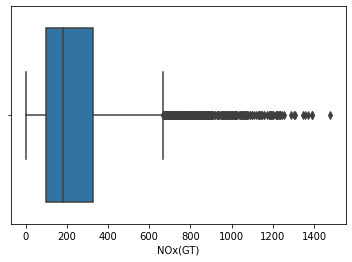

In [9]:
sns.boxplot(data_air_quality["NOx(GT)"])

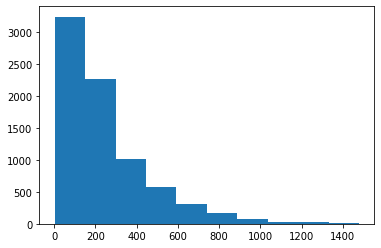

In [10]:
plt.hist(data_air_quality["NOx(GT)"].dropna())
plt.show()

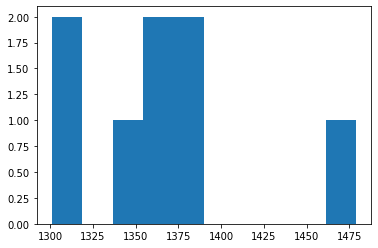

In [11]:
# Usuwamy na chwile wartosci < 1300
data_air_quality_tmp = data_air_quality.loc[data_air_quality["NOx(GT)"] > 1300, :]
plt.hist(data_air_quality_tmp["NOx(GT)"].dropna())
plt.show()

c:\users\kate\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PT08.S3(NOx)'>

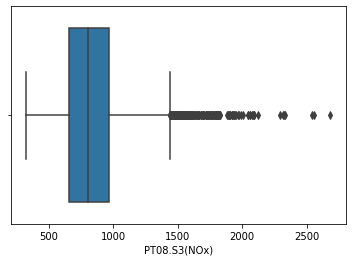

In [12]:
sns.boxplot(data_air_quality["PT08.S3(NOx)"])

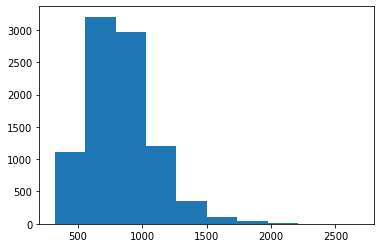

In [13]:
plt.hist(data_air_quality["PT08.S3(NOx)"].dropna())
plt.show()

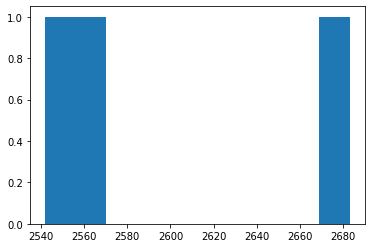

In [14]:
# Usunmy na chwile wartosc < 2500
data_air_quality_tmp = data_air_quality.loc[data_air_quality["PT08.S3(NOx)"] > 2500, :]
plt.hist(data_air_quality_tmp["PT08.S3(NOx)"].dropna())
plt.show()

Po analizie histogramów i wykresów pudełkowych można uznać, że zmienne nie mają nietypowych obserwacji (zmiennych odstających).

Sprawdzamy ile mamy brakujących warotości w każdej kolumnie.

In [15]:
data_air_quality.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Widzimy, że zmienna ```NMHC(GT)``` ma ponad 8 tys (czyli 90%) brakujących danych. Daje to nam podstawy do tego, by ją pominąć w dalszych rozważaniach.

In [16]:
# Usuwamy kolumne NMHC(GT)

data_air_quality.drop("NMHC(GT)", axis = 1, inplace = True)

In [17]:
print(data_air_quality.var())

CO(GT)                2.111941
PT08.S1(CO)       47123.742575
C6H6(GT)             55.499814
PT08.S2(NMHC)     71199.011290
NOx(GT)           45360.126046
PT08.S3(NOx)      65955.135860
NO2(GT)            2339.667327
PT08.S4(NO2)     119859.143884
PT08.S5(O3)      158789.727561
T                    78.006268
RH                  299.874765
AH                    0.163065
dtype: float64


Widzimy, że w zbiorze mamy bardzo bardzo dużą wariancję. W tym przypadku braki danych uzupełnimy medianą.

In [18]:
from sklearn.impute import SimpleImputer 

imp = SimpleImputer(missing_values = np.nan, strategy='median')
data_air_quality["CO(GT)"] = imp.fit_transform(data_air_quality["CO(GT)"].values.reshape(-1,1))[:,0]
data_air_quality["PT08.S1(CO)"] = imp.fit_transform(data_air_quality["PT08.S1(CO)"].values.reshape(-1,1))[:,0]
data_air_quality["C6H6(GT)"] = imp.fit_transform(data_air_quality["C6H6(GT)"].values.reshape(-1,1))[:,0]
data_air_quality["PT08.S2(NMHC)"] = imp.fit_transform(data_air_quality["PT08.S2(NMHC)"].values.reshape(-1,1))[:,0]
data_air_quality["NOx(GT)"] = imp.fit_transform(data_air_quality["NOx(GT)"].values.reshape(-1,1))[:,0]
data_air_quality["PT08.S3(NOx)"] = imp.fit_transform(data_air_quality["PT08.S3(NOx)"].values.reshape(-1,1))[:,0]
data_air_quality["NO2(GT)"] = imp.fit_transform(data_air_quality["NO2(GT)"].values.reshape(-1,1))[:,0]
data_air_quality["PT08.S4(NO2)"] = imp.fit_transform(data_air_quality["PT08.S4(NO2)"].values.reshape(-1,1))[:,0]
data_air_quality["PT08.S5(O3)"] = imp.fit_transform(data_air_quality["PT08.S5(O3)"].values.reshape(-1,1))[:,0]
data_air_quality["T"] = imp.fit_transform(data_air_quality["T"].values.reshape(-1,1))[:,0]
data_air_quality["RH"] = imp.fit_transform(data_air_quality["RH"].values.reshape(-1,1))[:,0]
data_air_quality["AH"] = imp.fit_transform(data_air_quality["AH"].values.reshape(-1,1))[:,0]

data_air_quality.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [19]:
data_air_quality.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      2.089302  1098.392433    10.009447     937.973923   235.178903   
std       1.323024   212.911465     7.311771     261.625561   195.091025   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.200000   941.000000     4.600000     743.000000   112.000000   
50%       1.800000  1063.000000     8.200000     909.000000   180.000000   
75%       2.600000  1221.000000    13.600000    1105.000000   284.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
mean     834.339959   112.373303   1456.528054  1020.562894    18.297574   
std      251.808888    43.948519    339.370072   390.784960     8.658221   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      666.000000    86.000000   1242.000000   742.000000    12.000000   
50%      806.000000   109.000000   1463.000000   963.000000    17.800000   
75%      960.000000   133.000000   1662.000000  1255.000000    24.100000   
max     2683.000000   340.000000   2775.000000  2523.000000    44.600000   

                RH           AH  
count  9357.000000  9357.000000  
mean     49.248509     1.024352  
std      16.974949     0.395878  
min       9.200000     0.184700  
25%      36.600000     0.746100  
50%      49.600000     0.995400  
75%      61.900000     1.296200  
max      88.700000     2.231000

Zapisujemy oczyszczone dane.

In [20]:
# data_air_quality.to_csv('AirQualityUCI_clean_data.csv', index=False, sep=';')

### Modelowanie

Usuwamy kolumny ```Date``` i ```Time``` ponieważ nie będą one brane pod uwagę w analizie.

In [21]:
data_air_quality.drop("Date", axis = 1, inplace = True)
data_air_quality.drop("Time", axis = 1, inplace = True)
data_air_quality.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1     92.0        1559.0        972.0  13.3  47.7  0.7255  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888

Sprawdzmy, jakie mamy korelacje między zmiennymi. Obliczmy wspóczynnik korelacji liniowej Pearsona i nieliniowej Spearmana. Wyniki możemy zwizualizować w postaci mapy ciepła (heat map).

In [22]:
corr_P = data_air_quality.corr("pearson")
corr_P.shape
corr_P

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.776948  0.808857       0.795959  0.780463   
PT08.S1(CO)    0.776948     1.000000  0.883871       0.892989  0.622549   
C6H6(GT)       0.808857     0.883871  1.000000       0.981596  0.616149   
PT08.S2(NMHC)  0.795959     0.892989  0.981596       1.000000  0.606179   
NOx(GT)        0.780463     0.622549  0.616149       0.606179  1.000000   
PT08.S3(NOx)  -0.619318    -0.770544 -0.733503      -0.795792 -0.572440   
NO2(GT)        0.656002     0.563442  0.533313       0.561938  0.760716   
PT08.S4(NO2)   0.548481     0.682363  0.764578       0.776969  0.200825   
PT08.S5(O3)    0.763513     0.899417  0.865711       0.880633  0.694823   
T              0.006049     0.048985  0.199273       0.241556 -0.245708   
RH             0.041137     0.114400 -0.061812      -0.090450  0.183940   
AH             0.022864     0.135728  0.168481       0.187196 -0.148286   

               PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T  \
CO(GT)            -0.619318  0.656002      0.548481     0.763513  0.006049   
PT08.S1(CO)       -0.770544  0.563442      0.682363     0.899417  0.048985   
C6H6(GT)          -0.733503  0.533313      0.764578     0.865711  0.199273   
PT08.S2(NMHC)     -0.795792  0.561938      0.776969     0.880633  0.241556   
NOx(GT)           -0.572440  0.760716      0.200825     0.694823 -0.245708   
PT08.S3(NOx)       1.000000 -0.574181     -0.538412    -0.795337 -0.144802   
NO2(GT)           -0.574181  1.000000      0.139986     0.630425 -0.169380   
PT08.S4(NO2)      -0.538412  0.139986      1.000000     0.590764  0.561183   
PT08.S5(O3)       -0.795337  0.630425      0.590764     1.000000 -0.026814   
T                 -0.144802 -0.169380      0.561183    -0.026814  1.000000   
RH                -0.056819 -0.082135     -0.032172     0.124776 -0.578625   
AH                -0.231597 -0.298206      0.629511     0.071151  0.656452   

                     RH        AH  
CO(GT)         0.041137  0.022864  
PT08.S1(CO)    0.114400  0.135728  
C6H6(GT)      -0.061812  0.168481  
PT08.S2(NMHC) -0.090450  0.187196  
NOx(GT)        0.183940 -0.148286  
PT08.S3(NOx)  -0.056819 -0.231597  
NO2(GT)       -0.082135 -0.298206  
PT08.S4(NO2)  -0.032172  0.629511  
PT08.S5(O3)    0.124776  0.071151  
T             -0.578625  0.656452  
RH             1.000000  0.167890  
AH             0.167890  1.000000

<AxesSubplot:>

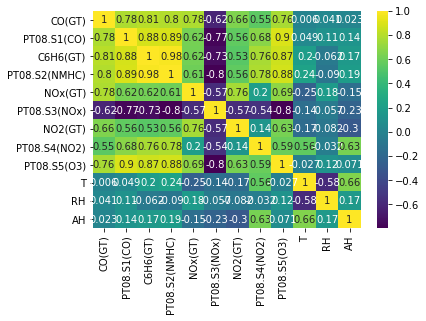

In [23]:
sns.heatmap(data_air_quality.corr("pearson"), annot = True, cmap='viridis')

In [24]:
corr_S = data_air_quality.corr("spearman")
corr_S.shape
corr_S

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.766535  0.810373       0.810457  0.703460   
PT08.S1(CO)    0.766535     1.000000  0.887509       0.887538  0.615854   
C6H6(GT)       0.810373     0.887509  1.000000       0.999975  0.595896   
PT08.S2(NMHC)  0.810457     0.887538  0.999975       1.000000  0.596053   
NOx(GT)        0.703460     0.615854  0.595896       0.596053  1.000000   
PT08.S3(NOx)  -0.707975    -0.852433 -0.847134      -0.847168 -0.682847   
NO2(GT)        0.669152     0.578698  0.575951       0.576101  0.814377   
PT08.S4(NO2)   0.525683     0.641846  0.745392       0.745418  0.123545   
PT08.S5(O3)    0.754354     0.893234  0.871119       0.871141  0.687593   
T              0.061866     0.080542  0.275804       0.275713 -0.255630   
RH            -0.012498     0.091293 -0.124253      -0.124159  0.164733   
AH             0.040454     0.134951  0.188813       0.188790 -0.164603   

               PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T  \
CO(GT)            -0.707975  0.669152      0.525683     0.754354  0.061866   
PT08.S1(CO)       -0.852433  0.578698      0.641846     0.893234  0.080542   
C6H6(GT)          -0.847134  0.575951      0.745392     0.871119  0.275804   
PT08.S2(NMHC)     -0.847168  0.576101      0.745418     0.871141  0.275713   
NOx(GT)           -0.682847  0.814377      0.123545     0.687593 -0.255630   
PT08.S3(NOx)       1.000000 -0.598099     -0.532199    -0.860358 -0.118923   
NO2(GT)           -0.598099  1.000000      0.131690     0.616498 -0.163207   
PT08.S4(NO2)      -0.532199  0.131690      1.000000     0.556141  0.613936   
PT08.S5(O3)       -0.860358  0.616498      0.556141     1.000000 -0.001925   
T                 -0.118923 -0.163207      0.613936    -0.001925  1.000000   
RH                -0.082772 -0.108961     -0.068230     0.127056 -0.539061   
AH                -0.216250 -0.279817      0.640727     0.080092  0.701363   

                     RH        AH  
CO(GT)        -0.012498  0.040454  
PT08.S1(CO)    0.091293  0.134951  
C6H6(GT)      -0.124253  0.188813  
PT08.S2(NMHC) -0.124159  0.188790  
NOx(GT)        0.164733 -0.164603  
PT08.S3(NOx)  -0.082772 -0.216250  
NO2(GT)       -0.108961 -0.279817  
PT08.S4(NO2)  -0.068230  0.640727  
PT08.S5(O3)    0.127056  0.080092  
T             -0.539061  0.701363  
RH             1.000000  0.152138  
AH             0.152138  1.000000

<AxesSubplot:>

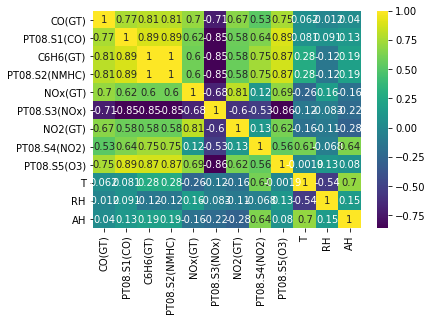

In [25]:
sns.heatmap(data_air_quality.corr("spearman"), annot = True, cmap='viridis')

In [26]:
# tworzymy macierz trójkątną i wyświetlamy wspóczynnik korelacji Pearsona większy od 0.5

corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype = np.bool), k = 1)).stack().sort_values()
corr_P_tri[abs(corr_P_tri)>0.75]

PT08.S2(NMHC)  PT08.S3(NOx)    -0.795792
PT08.S3(NOx)   PT08.S5(O3)     -0.795337
PT08.S1(CO)    PT08.S3(NOx)    -0.770544
NOx(GT)        NO2(GT)          0.760716
CO(GT)         PT08.S5(O3)      0.763513
C6H6(GT)       PT08.S4(NO2)     0.764578
CO(GT)         PT08.S1(CO)      0.776948
PT08.S2(NMHC)  PT08.S4(NO2)     0.776969
CO(GT)         NOx(GT)          0.780463
               PT08.S2(NMHC)    0.795959
               C6H6(GT)         0.808857
C6H6(GT)       PT08.S5(O3)      0.865711
PT08.S2(NMHC)  PT08.S5(O3)      0.880633
PT08.S1(CO)    C6H6(GT)         0.883871
               PT08.S2(NMHC)    0.892989
               PT08.S5(O3)      0.899417
C6H6(GT)       PT08.S2(NMHC)    0.981596
dtype: float64

In [27]:
# tworzymy macierz trójkątną i wyświetlamy wspóczynnik korelacji Spearmana większy od 0.5

corr_S = data_air_quality.corr("spearman")
corr_S_tri = corr_S.where(np.triu(np.ones(corr_S.shape, dtype = np.bool), k = 1)).stack().sort_values()
corr_S_tri[abs(corr_S_tri)>0.75]

PT08.S3(NOx)   PT08.S5(O3)     -0.860358
PT08.S1(CO)    PT08.S3(NOx)    -0.852433
PT08.S2(NMHC)  PT08.S3(NOx)    -0.847168
C6H6(GT)       PT08.S3(NOx)    -0.847134
CO(GT)         PT08.S5(O3)      0.754354
               PT08.S1(CO)      0.766535
               C6H6(GT)         0.810373
               PT08.S2(NMHC)    0.810457
NOx(GT)        NO2(GT)          0.814377
C6H6(GT)       PT08.S5(O3)      0.871119
PT08.S2(NMHC)  PT08.S5(O3)      0.871141
PT08.S1(CO)    C6H6(GT)         0.887509
               PT08.S2(NMHC)    0.887538
               PT08.S5(O3)      0.893234
C6H6(GT)       PT08.S2(NMHC)    0.999975
dtype: float64

Widzimy, że mamy dużo zmiennych wykazującą silną korelację z innymi zmiennymi, np ```C6H6(GT)```, ```PT08.S2(NMHC)``` czy ```CO(GT)```.

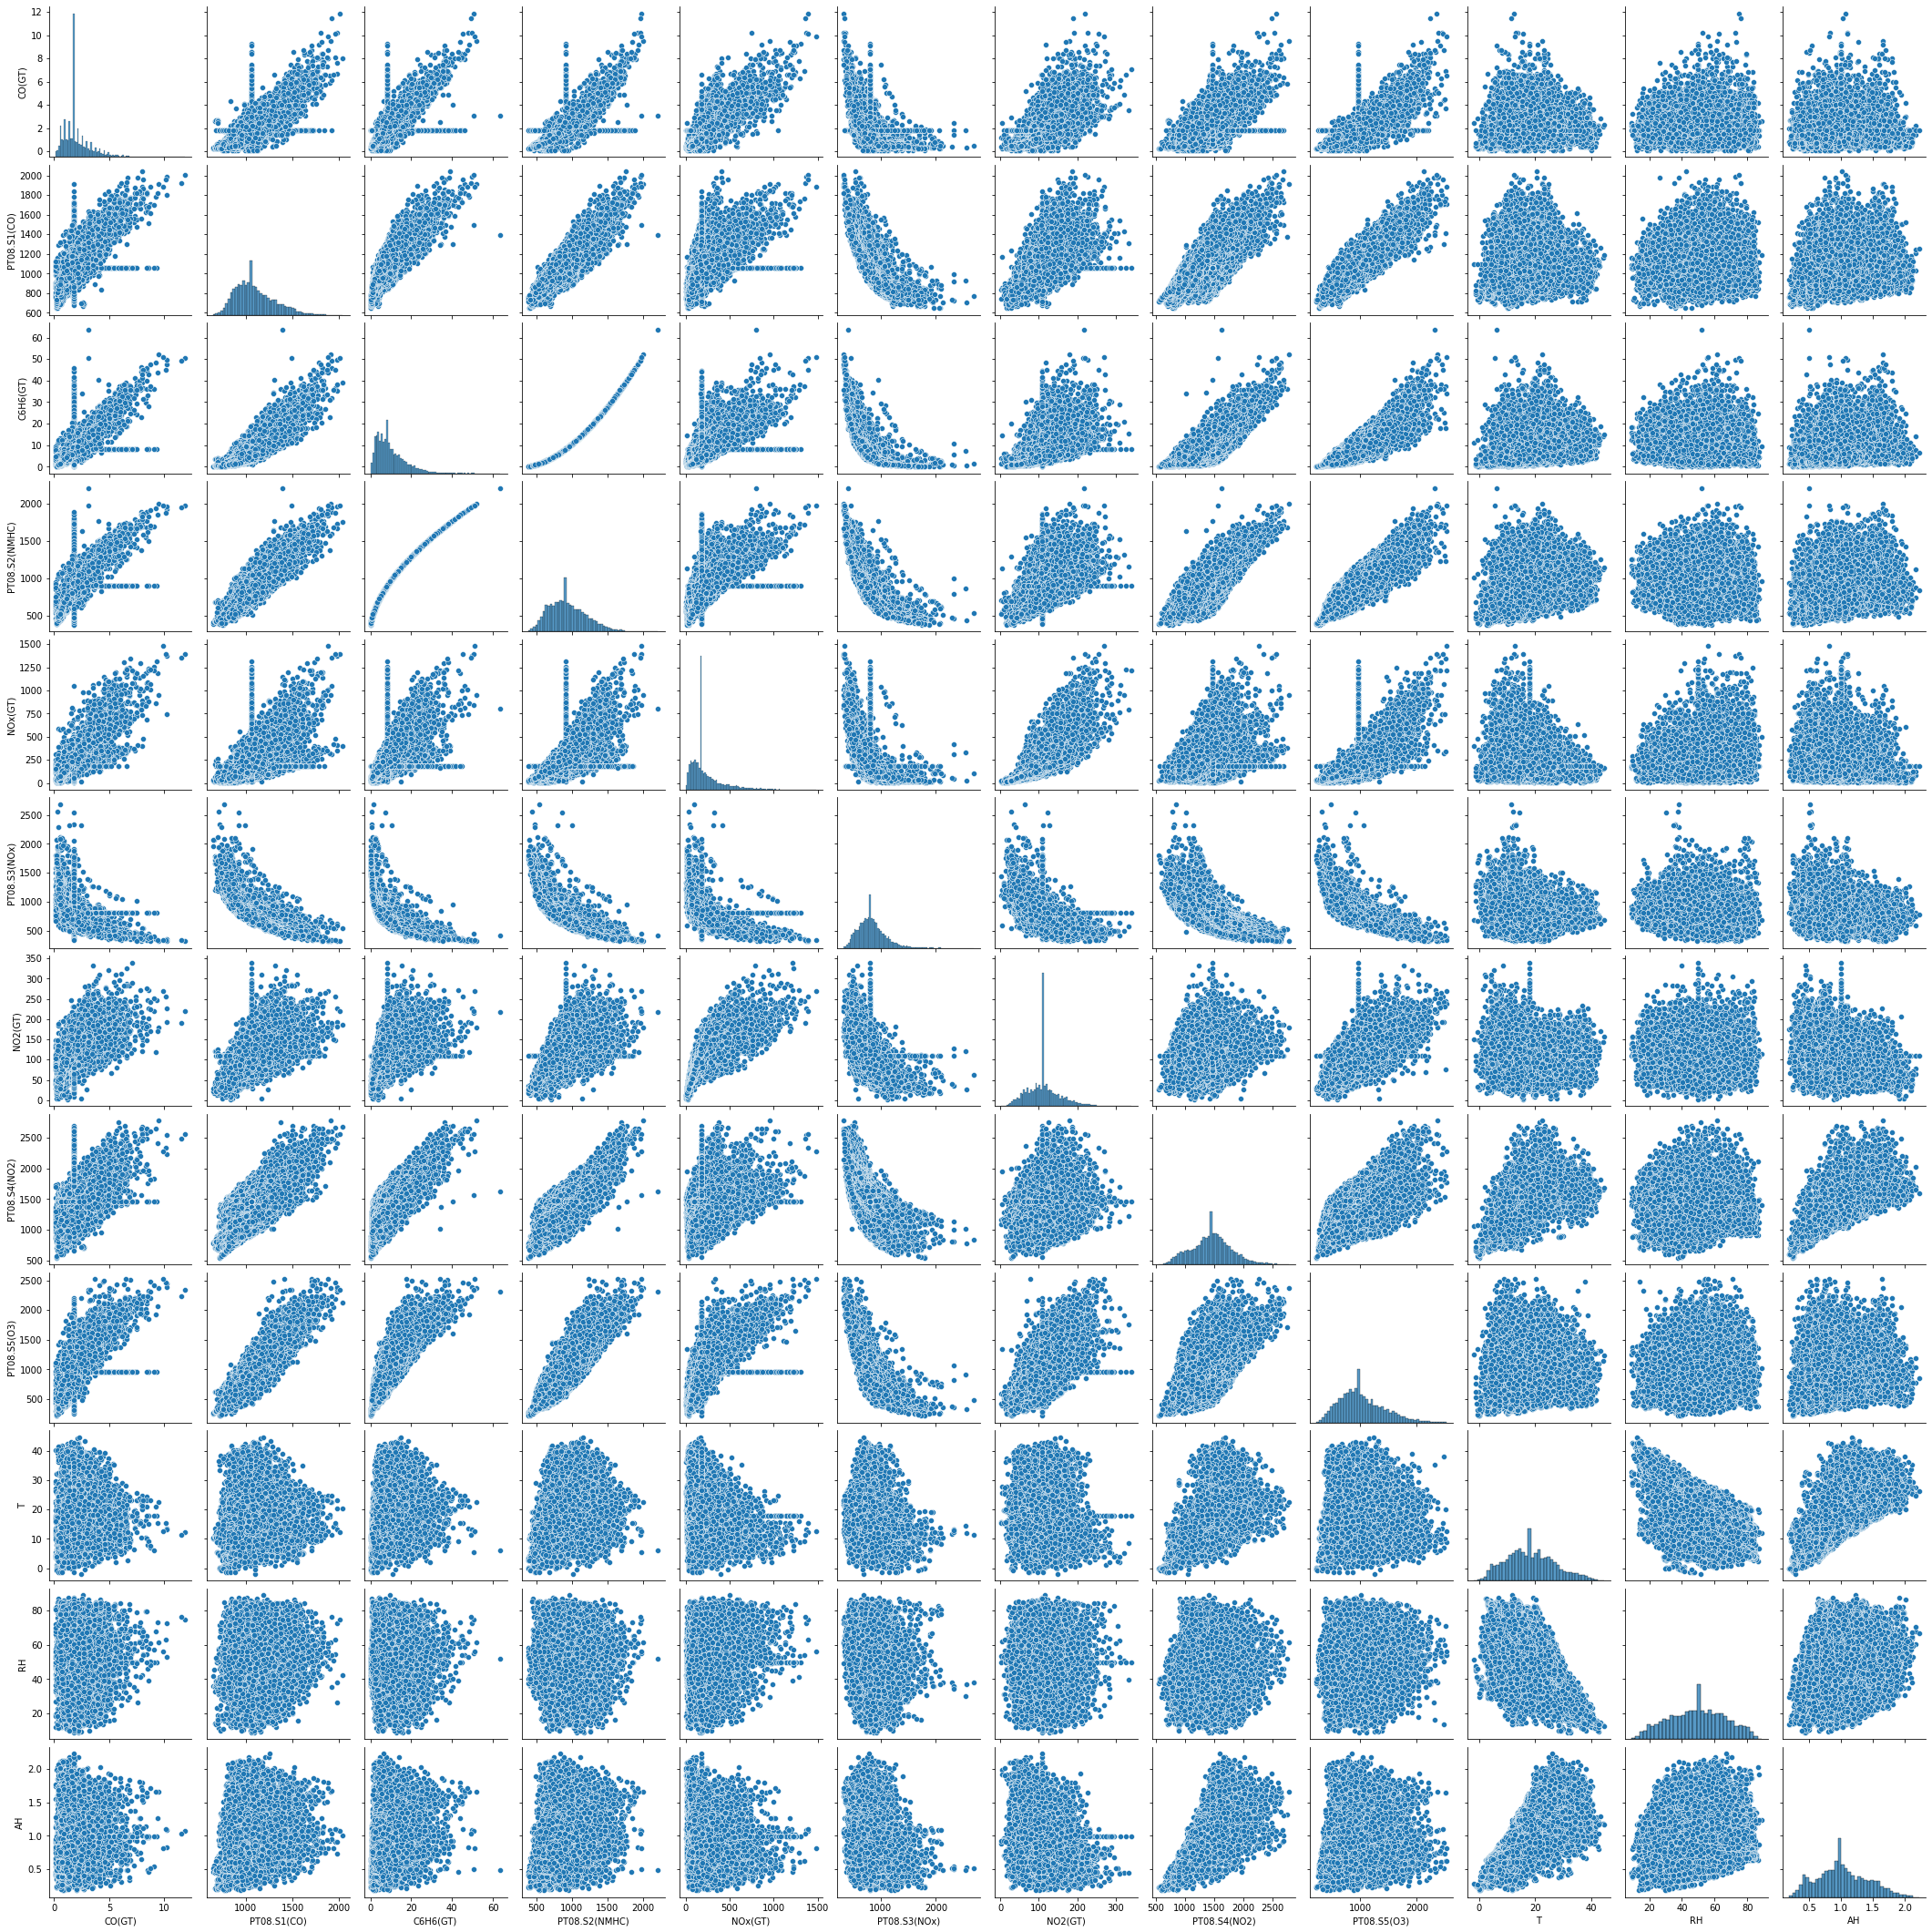

In [28]:
# wizualizacja korelacji przy pomocy seaborn pairplot
sns.pairplot(data_air_quality)
plt.show()

Tworzymy wektor kolumnowy zmiennej objaśnianej y i macierz zmiennych objaśniających (predyktorów) X

In [29]:
y = data_air_quality.iloc[:, -1]
y.head()

0    0.7578
1    0.7255
2    0.7502
3    0.7867
4    0.7888
Name: AH, dtype: float64

In [30]:
X = data_air_quality.iloc[:, :-1]
X.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  
0    113.0        1692.0       1268.0  13.6  48.9  
1     92.0        1559.0        972.0  13.3  47.7  
2    114.0        1555.0       1074.0  11.9  54.0  
3    122.0        1584.0       1203.0  11.0  60.0  
4    116.0        1490.0       1110.0  11.2  59.6

Tworzymy model Regresji Liniowej.

Wzór matematyczny:

$ y = \beta_0 + \beta_1 x + \beta_2 x + ... + \beta_n x $,

gdzie $\beta_0$ to wyraz wolny.

In [31]:
import sklearn.linear_model
reg_model_line = sklearn.linear_model.LinearRegression()

In [32]:
reg_model_line.fit(X, y)

LinearRegression()

Wyraz wolny dla naszego modelu jest równy:

In [33]:
print("Intercept: ", reg_model_line.intercept_)

Intercept:  0.33408202853218816


Wartości współczynników regresji:

In [34]:
print("Coefficients: ", reg_model_line.coef_)

Coefficients:  [-1.23856150e-02 -2.29645656e-04  1.68886374e-02 -1.06933517e-03
  1.91237145e-04 -3.96734124e-04 -7.99584008e-04  4.41496205e-04
  8.01923394e-05  4.06828314e-02  1.43953323e-02]


Sprawdzamy, czy model został poprawnie nauczony przewidywać wartości średnie predyktorów.

In [35]:
data_air_quality.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      2.089302  1098.392433    10.009447     937.973923   235.178903   
std       1.323024   212.911465     7.311771     261.625561   195.091025   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.200000   941.000000     4.600000     743.000000   112.000000   
50%       1.800000  1063.000000     8.200000     909.000000   180.000000   
75%       2.600000  1221.000000    13.600000    1105.000000   284.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
mean     834.339959   112.373303   1456.528054  1020.562894    18.297574   
std      251.808888    43.948519    339.370072   390.784960     8.658221   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      666.000000    86.000000   1242.000000   742.000000    12.000000   
50%      806.000000   109.000000   1463.000000   963.000000    17.800000   
75%      960.000000   133.000000   1662.000000  1255.000000    24.100000   
max     2683.000000   340.000000   2775.000000  2523.000000    44.600000   

                RH           AH  
count  9357.000000  9357.000000  
mean     49.248509     1.024352  
std      16.974949     0.395878  
min       9.200000     0.184700  
25%      36.600000     0.746100  
50%      49.600000     0.995400  
75%      61.900000     1.296200  
max      88.700000     2.231000

In [36]:
X_new = X.mean().values.reshape(1,-1)
X_new

array([[   2.08930213, 1098.39243347,   10.00944747,  937.97392327,
         235.17890349,  834.33995939,  112.37330341, 1456.52805386,
        1020.56289409,   18.29757401,   49.24850914]])

Sprawdzamy, czy model został poprawnie nauczony przewidywać wartości średnie wilgotności bezwzględnej AH.

In [37]:
reg_model_line.predict(X_new)

array([1.02435173])

Badamy jaki jest wpływ poszczególnej zmiennej na zmienną celu - jaka jest zdolność predykcyjna każdej zmiennej. Stosujemy standaryzację Z (ang. Z-score Normalization), czyli standaryzujemy dane na zbiorze z predyktorami. Przy okazji standaryzujemy y.

In [38]:
# dla zbioru wystandaryzowanego, współczynniki regresji nabierają przydatnej interpretacji
# tzn. im większa wartość modułu współczynnika, tym bardziej istotny ma on wpływ na wartość odpowiedzi
X_std = (X - X.mean(axis = 0))/X.std(axis = 0)
X_std.describe()

CO(GT)   PT08.S1(CO)      C6H6(GT)  PT08.S2(NMHC)       NOx(GT)  \
count  9.357000e+03  9.357000e+03  9.357000e+03   9.357000e+03  9.357000e+03   
mean   2.004737e-16  2.278111e-16 -1.822489e-16   1.457991e-16  9.719939e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00   
min   -1.503602e+00 -2.120095e+00 -1.355273e+00  -2.121253e+00 -1.195231e+00   
25%   -6.721737e-01 -7.392389e-01 -7.398273e-01  -7.452403e-01 -6.313920e-01   
50%   -2.186673e-01 -1.662308e-01 -2.474705e-01  -1.107458e-01 -2.828367e-01   
75%    3.860079e-01  5.758617e-01  4.910647e-01   6.384165e-01  2.502478e-01   
max    7.415357e+00  4.422531e+00  7.343030e+00   4.877299e+00  6.375594e+00   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)   PT08.S5(O3)             T  \
count  9.357000e+03  9357.000000  9.357000e+03  9.357000e+03  9.357000e+03   
mean   7.289954e-17     0.000000  2.915982e-16 -2.733733e-17  2.672983e-16   
std    1.000000e+00     1.000000  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.034638e+00    -2.511423 -2.668261e+00 -2.046043e+00 -2.332762e+00   
25%   -6.685227e-01    -0.600095 -6.321360e-01 -7.128291e-01 -7.273519e-01   
50%   -1.125455e-01    -0.076756  1.907047e-02 -1.473007e-01 -5.746839e-02   
75%    4.990294e-01     0.469338  6.054510e-01  5.999133e-01  6.701637e-01   
max    7.341520e+00     5.179394  3.885057e+00  3.844665e+00  3.037856e+00   

                 RH  
count  9.357000e+03  
mean   1.184618e-16  
std    1.000000e+00  
min   -2.359271e+00  
25%   -7.451279e-01  
50%    2.070645e-02  
75%    7.453036e-01  
max    2.324101e+00

In [39]:
y_std = (y - y.mean())/y.std()
y_std.describe()

count    9.357000e+03
mean     1.822489e-16
std      1.000000e+00
min     -2.120983e+00
25%     -7.028716e-01
50%     -7.313286e-02
75%      6.866963e-01
max      3.048027e+00
Name: AH, dtype: float64

In [40]:
reg_model_line_std = sklearn.linear_model.LinearRegression()
reg_model_line_std.fit(X_std, y_std)

LinearRegression()

In [41]:
pd.Series(np.abs(reg_model_line_std.coef_), index = X.columns.to_list()).round(4).sort_values(ascending = False)

T                0.8898
PT08.S2(NMHC)    0.7067
RH               0.6173
PT08.S4(NO2)     0.3785
C6H6(GT)         0.3119
PT08.S3(NOx)     0.2524
PT08.S1(CO)      0.1235
NOx(GT)          0.0942
NO2(GT)          0.0888
PT08.S5(O3)      0.0792
CO(GT)           0.0414
dtype: float64

Dostaliśmy współczynniki modelu, które można traktować jako takie, które mają największy wpływn (są najbardziej istotne) na wilgotność bezwzględną AH. Widzimy, że temperatura ```T```, ```PT08.S2(NMHC)``` i wilgotność względna ```RH``` będą miały największy wpływ na wyjaśnianie poziomu wilgotności bezwględnej. Sprawdzamy, jaka będzie predykcja na całym zbiorze.

In [42]:
y_pred = reg_model_line.predict(X)
y_pred[0:10]

array([0.70036639, 0.62449509, 0.64851187, 0.7416293 , 0.75265577,
       0.7304933 , 0.66497675, 0.71867293, 0.70128486, 0.66541489])

In [43]:
y[0:10]

0    0.7578
1    0.7255
2    0.7502
3    0.7867
4    0.7888
5    0.7848
6    0.7603
7    0.7702
8    0.7648
9    0.7517
Name: AH, dtype: float64

Widzimy, że póki co wartości predykcyjne modelu nie są najlepsze.

In [44]:
# współczynnik determinacji R2
# reg_model_line.score(X,y)

In [45]:
# współczynnik determinacji R2 z pakietu sklearn
# sklearn.metrics.r2_score(y, y_pred)

In [46]:
# Mean Squared Error
# sklearn.metrics.mean_squared_error(y, y_pred)

In [47]:
# Mean Absolute Error
# sklearn.metrics.mean_absolute_error(y, y_pred)

In [48]:
# Median Absolute Error
# sklearn.metrics.median_absolute_error(y, y_pred)

Dzielimy zbiór na część uczącą (train) i testową (test).

In [49]:
# Dzielimy zbiór na próbę uczącą (80%) i testową (20%)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=12345)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7485, 11)
(1872, 11)
(7485,)
(1872,)


In [50]:
# tworzymy funkcję, która dopasowuje model regresji liniowej do danej próby oraz oblicza miary błędów dopasowania

def fit_regression(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2 = sklearn.metrics.r2_score
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    medae = sklearn.metrics.median_absolute_error
    
    return {
        "r_score_train": r2(y_train, y_train_pred),
        "r_score_test": r2(y_test, y_test_pred),
        "MSE_train": mse(y_train, y_train_pred),
        "MSE_test": mse(y_test, y_test_pred),
        "MAE_train": mae(y_train, y_train_pred),
        "MAE_test": mae(y_test, y_test_pred),
        "MedAE_train": medae(y_train, y_train_pred),
        "MedAE_test": medae(y_test, y_test_pred)
        
    }

Możemy teraz policzyć wartości poszczególnych błędów dla podziału, który zrobiliśmy.

In [51]:
#przedstawiamy działanie powyższej funkcji oraz wyniki

models = ["Reg. liniowa"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_train, X_test, y_train, y_test)]
df_results_errors = pd.DataFrame(res, index = models)

In [52]:
df_results_errors

r_score_train  r_score_test  MSE_train  MSE_test  MAE_train  \
Reg. liniowa       0.904687      0.906531    0.01478  0.015254     0.0927   

              MAE_test  MedAE_train  MedAE_test  
Reg. liniowa  0.091806     0.072023    0.067926

Z powyższej tabeli widzimy, że nasz model jest dosyć stabilny. Sprawdzamy, co się stanie, jeśli zmienimy sposób losowania.

In [53]:
X_train123, X_test123, y_train123, y_test123 = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, 
                                                                                        random_state = 123)

In [54]:
models = ["Reg. liniowa rs123"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_train123, X_test123, y_train123, y_test123)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index = models))

In [55]:
df_results_errors

r_score_train  r_score_test  MSE_train  MSE_test  \
Reg. liniowa             0.904687      0.906531   0.014780  0.015254   
Reg. liniowa rs123       0.905261      0.904292   0.014959  0.014537   

                    MAE_train  MAE_test  MedAE_train  MedAE_test  
Reg. liniowa          0.09270  0.091806     0.072023    0.067926  
Reg. liniowa rs123    0.09288  0.092408     0.071500    0.072316

Jak widzimy powyżej zmiana parametru ```random_state```, czyli sposobu losowania, nie wpłyneła znacząco na model. Ustabilizował się błąd ```MedAE``` oraz ```MSE```. Ogólne wartości błędów są niskie. Sprawdzimy, czy podział zbioru na treningowy i testowy w innych proporcjach wpływa na model.

In [56]:
X_train70, X_test70, y_train70, y_test70 = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, 
                                                                                        random_state = 12345)

In [57]:
models = ["Reg. liniowa 70:30"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_train70, X_test70, y_train70, y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index = models))

In [58]:
df_results_errors

r_score_train  r_score_test  MSE_train  MSE_test  \
Reg. liniowa             0.904687      0.906531   0.014780  0.015254   
Reg. liniowa rs123       0.905261      0.904292   0.014959  0.014537   
Reg. liniowa 70:30       0.904417      0.906528   0.014895  0.014837   

                    MAE_train  MAE_test  MedAE_train  MedAE_test  
Reg. liniowa          0.09270  0.091806     0.072023    0.067926  
Reg. liniowa rs123    0.09288  0.092408     0.071500    0.072316  
Reg. liniowa 70:30    0.09319  0.091310     0.072242    0.068896

Z wyników widzimy, że podział zbioru wpłynął na błąd ```MAE``` i ```MedAE``` - zdestabilizował je. Sprawdźmy, czy podział zbioru oraz sposób losowania znacząco wpływa na model.

In [59]:
X_train70_123, X_test70_123, y_train70_123, y_test70_123 = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, 
                                                                                        random_state = 123)

In [60]:
models = ["Reg. liniowa 70:30 rs123"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_train70, X_test70, y_train70, y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index = models))

In [61]:
df_results_errors

r_score_train  r_score_test  MSE_train  MSE_test  \
Reg. liniowa                   0.904687      0.906531   0.014780  0.015254   
Reg. liniowa rs123             0.905261      0.904292   0.014959  0.014537   
Reg. liniowa 70:30             0.904417      0.906528   0.014895  0.014837   
Reg. liniowa 70:30 rs123       0.904417      0.906528   0.014895  0.014837   

                          MAE_train  MAE_test  MedAE_train  MedAE_test  
Reg. liniowa                0.09270  0.091806     0.072023    0.067926  
Reg. liniowa rs123          0.09288  0.092408     0.071500    0.072316  
Reg. liniowa 70:30          0.09319  0.091310     0.072242    0.068896  
Reg. liniowa 70:30 rs123    0.09319  0.091310     0.072242    0.068896

Z tabeli widzimy, że sposób losowania nie ma wpłyną na wynik przy podziale zbioru na 70% uczącego i 30% testowego.

W związku z tym, że model z podziałem zbioru na 80% uczącego i 20% testowego i sposób losowania ```random_state = 123``` otrzymał najlepsze wyniki, będziemy z niego korzystać w dalszej części. Sprawdzamy, jak model będzie pracował na danych wystandaryzowanych.

In [62]:
X_train123_std, X_test123_std, y_train123_std, y_test123_std = sklearn.model_selection.train_test_split(X_std, y_std, 
                                                                                                    test_size = 0.2, 
                                                                                                    random_state = 123)

In [63]:
models = ["Reg. liniowa rs123 std"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_train123_std, X_test123_std, y_train123_std, y_test123_std)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index = models))

In [64]:
df_results_errors

r_score_train  r_score_test  MSE_train  MSE_test  \
Reg. liniowa                   0.904687      0.906531   0.014780  0.015254   
Reg. liniowa rs123             0.905261      0.904292   0.014959  0.014537   
Reg. liniowa 70:30             0.904417      0.906528   0.014895  0.014837   
Reg. liniowa 70:30 rs123       0.904417      0.906528   0.014895  0.014837   
Reg. liniowa rs123 std         0.905261      0.904292   0.095451  0.092760   

                          MAE_train  MAE_test  MedAE_train  MedAE_test  
Reg. liniowa               0.092700  0.091806     0.072023    0.067926  
Reg. liniowa rs123         0.092880  0.092408     0.071500    0.072316  
Reg. liniowa 70:30         0.093190  0.091310     0.072242    0.068896  
Reg. liniowa 70:30 rs123   0.093190  0.091310     0.072242    0.068896  
Reg. liniowa rs123 std     0.234618  0.233424     0.180610    0.182673

Możemy zauważyć, że na danych wystandaryzowanych wartości parametru ```R^2``` nie zmieniają się, natomiast zwiększają się wartości błędów. Nie zmieniło to stabilności modelu - ma on taką samą zdolność predykcyjną co na danych niezestandaryzownych.

Chcemy dążyć do tego, żeby model był jak najmniej skomplikowany, tzn. żeby miał jak największą zdolność do oszacowywania wartości wilgotności bezwzględnej, a w drugim przypadku, żeby miał jak najmniejszą liczbę zmiennych.

Budujemy wielomian drugiego stopnia.

In [65]:
# model wielomianowy
# korzystamy z funkcji PolynomialFeatures ze stopniem 2,
# aby wygenerować nowe cechy, które są iloczynem cech bazowych,
# np. [x1,x2,x3] -> [x1, x2, x3, x1^2, x1x2, x1x3, x2^2, x2x3, x3^2]

In [66]:
import sklearn.preprocessing

In [67]:
# budujemy model wielomianowy przekształcając zbiór treningowy predyktorów X_train oraz zbiór testowy predyktorów X_test
wielomian2 = sklearn.preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
X2_train123 = wielomian2.fit_transform(X_train123)
X2_test123 = wielomian2.fit_transform(X_test123)

In [68]:
X2_train123.shape

(7485, 77)

In [69]:
models = ["Reg. liniowa polyf"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), X2_train123, X2_test123, y_train123, y_test123)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index = models))

In [70]:
df_results_errors

r_score_train  r_score_test  MSE_train  MSE_test  \
Reg. liniowa                   0.904687      0.906531   0.014780  0.015254   
Reg. liniowa rs123             0.905261      0.904292   0.014959  0.014537   
Reg. liniowa 70:30             0.904417      0.906528   0.014895  0.014837   
Reg. liniowa 70:30 rs123       0.904417      0.906528   0.014895  0.014837   
Reg. liniowa rs123 std         0.905261      0.904292   0.095451  0.092760   
Reg. liniowa polyf             0.995216      0.994874   0.000755  0.000779   

                          MAE_train  MAE_test  MedAE_train  MedAE_test  
Reg. liniowa               0.092700  0.091806     0.072023    0.067926  
Reg. liniowa rs123         0.092880  0.092408     0.071500    0.072316  
Reg. liniowa 70:30         0.093190  0.091310     0.072242    0.068896  
Reg. liniowa 70:30 rs123   0.093190  0.091310     0.072242    0.068896  
Reg. liniowa rs123 std     0.234618  0.233424     0.180610    0.182673  
Reg. liniowa polyf         0.019764  0.019927     0.014635    0.014610

Porównujemy wartości liczbowe z wierszem ```Regresja liniowa rs123```. Widzimy, że w modelu wielomianowym wartość ```R^2``` znacząco wzrosła w zbiorze treningowym i testowym. Wartości błędów także znacząco zmalały. Niestety nasz model ma teraz 77 zmiennych, a jak pisaliśmy wcześniej, chcemy, żeby model byj jak najmniej skomplikowany - mniał najmniejszą ilość predyktorów i jak najlepiej przewidywał.

In [71]:
# redukcja zmiennych modelu
# szukamy równowagi pomiędzy złożonością modelu a jego jakością

# wyboru zmiennych do modelu możemy dokonać korzystając z kryterium Schwarza (BIC - Bayesian Information Criterion)
# wybieramy taki model regresji, który minimalizuje
# BIC(MSE_p, p, n) = n*log(MSE_p) + p*log(n)
# p to liczba zmiennych
# MSE_p jest liczone dla modelu zbudowanego na podstawie p<=d zmiennych
# p*log(n) to kara za złożoność modelu

def BIC(mse, p, n):
    return n*np.log(mse) + p*np.log(n)

In [72]:
# liczba wszystkich możliwych przypadków do rozpatrzenia jest rzędu 2^d
# 1. zaczynamy od modelu pustego. BIC wynosi +nieskończoność
# 2. rozszerzamy model o zmienną, dla której BIC jest najmniejsza i
#   jednocześnie zmniejsza aktualną wartość BIC - jeśli takiej nie ma zwracamy aktualny model
# 3. powtarzamy 2. aż do wyczerpania możliwości

In [73]:
def forward_selection(X, y):
    n, m = X.shape
    best_idx = []
    best_free = set(range(m))
    best_fit = np.inf
    res = []
    
    for i in range(0, m):
        cur_idx = -1
        cur_fit = np.inf
        for e in best_free:
            r = sklearn.linear_model.LinearRegression()
            test_idx = best_idx + [e]
            r.fit(X[:, test_idx], y)
            test_fit = BIC(sklearn.metrics.mean_squared_error(y, r.predict(X[:, test_idx])), i+2, n)
            if test_fit < cur_fit: cur_idx, cur_fit = e, test_fit
        if cur_fit > best_fit: break
        
        best_idx, best_fit = best_idx + [cur_idx], cur_fit
        best_free.discard(cur_idx)
        res.append((cur_idx, cur_fit))
    return res

In [74]:
# stosujemy algorytm wyboru zmiennych do zbioru przekształconego wielomianowo

wybrane_df = pd.DataFrame(forward_selection(X2_train123, y_train123), columns=["zmienna", "BIC"])

wybrane_zmienne = wybrane_df["zmienna"].tolist()

wybrane_df["nazwa"] = [X.columns[w >= 1].append(X.columns[w == 2]).str.cat(sep = "*") for w in wielomian2.powers_[wybrane_zmienne]]

wybrane_df

zmienna           BIC                       nazwa
0        75 -31590.437826                        T*RH
1        74 -37288.358750                         T*T
2         9 -47661.064804                           T
3        76 -47908.865879                       RH*RH
4        10 -48142.528229                          RH
5        69 -48258.683393              PT08.S4(NO2)*T
6        67 -48758.743588   PT08.S4(NO2)*PT08.S4(NO2)
7        47 -49122.390810             PT08.S2(NMHC)*T
8        45 -50266.848731  PT08.S2(NMHC)*PT08.S4(NO2)
9        60 -50736.343039              PT08.S3(NOx)*T
10        5 -50980.577590                PT08.S3(NOx)
11       65 -51078.204948                   NO2(GT)*T
12       66 -51371.742013                  NO2(GT)*RH
13        7 -51465.971873                PT08.S4(NO2)
14        3 -52015.236941               PT08.S2(NMHC)
15       23 -52143.951121        PT08.S1(CO)*C6H6(GT)
16       73 -52216.032559              PT08.S5(O3)*RH
17       54 -52267.486952                   NOx(GT)*T
18       55 -52626.405975                  NOx(GT)*RH
19       38 -52725.169223        C6H6(GT)*PT08.S5(O3)
20       61 -52744.699813             PT08.S3(NOx)*RH
21       58 -52775.177138   PT08.S3(NOx)*PT08.S4(NO2)
22       32 -52805.957732           C6H6(GT)*C6H6(GT)
23       37 -52923.727998       C6H6(GT)*PT08.S4(NO2)
24       34 -52967.842035            C6H6(GT)*NOx(GT)
25       33 -53002.773760      C6H6(GT)*PT08.S2(NMHC)
26       44 -53039.767219       PT08.S2(NMHC)*NO2(GT)
27       56 -53044.640413   PT08.S3(NOx)*PT08.S3(NOx)
28       26 -53047.372574    PT08.S1(CO)*PT08.S3(NOx)
29       22 -53059.411493     PT08.S1(CO)*PT08.S1(CO)
30        1 -53078.539638                 PT08.S1(CO)
31       30 -53099.311711               PT08.S1(CO)*T
32       59 -53101.239668    PT08.S3(NOx)*PT08.S5(O3)
33       72 -53104.894632               PT08.S5(O3)*T
34       53 -53114.515757         NOx(GT)*PT08.S5(O3)
35       42 -53121.230724       PT08.S2(NMHC)*NOx(GT)
36       50 -53139.626914        NOx(GT)*PT08.S3(NOx)
37        4 -53151.738308                     NOx(GT)
38       52 -53166.415968        NOx(GT)*PT08.S4(NO2)
39       43 -53175.534012  PT08.S2(NMHC)*PT08.S3(NOx)
40       71 -53183.391094     PT08.S5(O3)*PT08.S5(O3)
41       25 -53191.054087         PT08.S1(CO)*NOx(GT)
42       28 -53198.357649    PT08.S1(CO)*PT08.S4(NO2)
43       24 -53204.310768   PT08.S1(CO)*PT08.S2(NMHC)
44       70 -53209.768503             PT08.S4(NO2)*RH
45       48 -53241.316805            PT08.S2(NMHC)*RH
46       46 -53242.347063   PT08.S2(NMHC)*PT08.S5(O3)
47       21 -53242.445700                   CO(GT)*RH

Widzimy, że model redukcji zmiennych wybrał 48 zmiennych, które są najlepsze dla modelu. Jest to o 29 mniej zmiennych, niż w przypadku modleu wielomianowego. Z korelacji Pearsona widzieliśmy, ze istnieje korealacja liniowa między zmiennymi, ale korelacja Spearmana dodatkowo wykazała, że w zbiorze mogą istnieć nieliniowości - co widzimy powyżej.

In [75]:
models = ["Reg. liniowa BIC"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), 
                      X2_train123[:, wybrane_zmienne],
                      X2_test123[:, wybrane_zmienne],
                      y_train123,
                      y_test123)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index = models))

In [76]:
df_results_errors

r_score_train  r_score_test  MSE_train  MSE_test  \
Reg. liniowa                   0.904687      0.906531   0.014780  0.015254   
Reg. liniowa rs123             0.905261      0.904292   0.014959  0.014537   
Reg. liniowa 70:30             0.904417      0.906528   0.014895  0.014837   
Reg. liniowa 70:30 rs123       0.904417      0.906528   0.014895  0.014837   
Reg. liniowa rs123 std         0.905261      0.904292   0.095451  0.092760   
Reg. liniowa polyf             0.995216      0.994874   0.000755  0.000779   
Reg. liniowa BIC               0.995136      0.994804   0.000768  0.000789   

                          MAE_train  MAE_test  MedAE_train  MedAE_test  
Reg. liniowa               0.092700  0.091806     0.072023    0.067926  
Reg. liniowa rs123         0.092880  0.092408     0.071500    0.072316  
Reg. liniowa 70:30         0.093190  0.091310     0.072242    0.068896  
Reg. liniowa 70:30 rs123   0.093190  0.091310     0.072242    0.068896  
Reg. liniowa rs123 std     0.234618  0.233424     0.180610    0.182673  
Reg. liniowa polyf         0.019764  0.019927     0.014635    0.014610  
Reg. liniowa BIC           0.019945  0.019962     0.014933    0.014833

Metryka ```R^2``` w modelu po redukcji zmiennych w obu zbiorach delikatnie zmalała. Wartości błędów dalej są stabilne. Możemy sprawdzić, co się stanie z modelem po zastosowaniu kryterium Akaikego - innego kryterium wyboru zmiennych.

In [77]:
# Kryterium Akaikego
# AIC(MSE_p, p, n) = n*log(MSE_p) + 2*p

def AIC(mse, p, n):
    return n*np.log(mse) + 2*p

In [78]:
def forward_selection_AIC(X, y):
    n, m = X.shape
    best_idx = []
    best_free = set(range(m))
    best_fit = np.inf
    res = []
    
    for i in range(0, m):
        cur_idx = -1
        cur_fit = np.inf
        for e in best_free:
            r = sklearn.linear_model.LinearRegression()
            test_idx = best_idx + [e]
            r.fit(X[:, test_idx], y)
            test_fit = AIC(sklearn.metrics.mean_squared_error(y, r.predict(X[:, test_idx])), i+2, n)
            if test_fit < cur_fit: cur_idx, cur_fit = e, test_fit
        if cur_fit > best_fit: break
        
        best_idx, best_fit = best_idx + [cur_idx], cur_fit
        best_free.discard(cur_idx)
        res.append((cur_idx, cur_fit))
    return res

In [79]:
# stosujemy algorytm wyboru zmiennych do zbioru przekształconego wielomianowo

wybrane_df_AIC = pd.DataFrame(forward_selection_AIC(X2_train123, y_train123), columns=["zmienna", "AIC"])

wybrane_zmienne_AIC = wybrane_df_AIC["zmienna"].tolist()

wybrane_df_AIC["nazwa"] = [X.columns[w >= 1].append(X.columns[w == 2]).str.cat(sep = "*") for w in wielomian2.powers_[wybrane_zmienne_AIC]]

wybrane_df_AIC

zmienna           AIC                nazwa
0        75 -31604.279139                 T*RH
1        74 -37309.120719                  T*T
2         9 -47688.747430                    T
3        76 -47943.469160                RH*RH
4        10 -48184.052167                   RH
..      ...           ...                  ...
59       15 -53661.842701       CO(GT)*NOx(GT)
60       17 -53662.806624       CO(GT)*NO2(GT)
61        0 -53664.563684               CO(GT)
62       27 -53664.955272  PT08.S1(CO)*NO2(GT)
63       49 -53665.268911      NOx(GT)*NOx(GT)

[64 rows x 3 columns]

Widzimy, że model redukcji AIC wybrał 64 predyktorów - o 16 więcej niż w modelu BIC i o 13 mniej niż w modelu wielomianowym. Oznacza to, że model z redukcją BIC jest najprostszy.

In [80]:
models = ["Reg. liniowa AIC"]
res = [fit_regression(sklearn.linear_model.LinearRegression(), 
                      X2_train123[:, wybrane_zmienne_AIC],
                      X2_test123[:, wybrane_zmienne_AIC],
                      y_train123,
                      y_test123)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index = models))

In [81]:
df_results_errors

r_score_train  r_score_test  MSE_train  MSE_test  \
Reg. liniowa                   0.904687      0.906531   0.014780  0.015254   
Reg. liniowa rs123             0.905261      0.904292   0.014959  0.014537   
Reg. liniowa 70:30             0.904417      0.906528   0.014895  0.014837   
Reg. liniowa 70:30 rs123       0.904417      0.906528   0.014895  0.014837   
Reg. liniowa rs123 std         0.905261      0.904292   0.095451  0.092760   
Reg. liniowa polyf             0.995216      0.994874   0.000755  0.000779   
Reg. liniowa BIC               0.995136      0.994804   0.000768  0.000789   
Reg. liniowa AIC               0.995210      0.994851   0.000756  0.000782   

                          MAE_train  MAE_test  MedAE_train  MedAE_test  
Reg. liniowa               0.092700  0.091806     0.072023    0.067926  
Reg. liniowa rs123         0.092880  0.092408     0.071500    0.072316  
Reg. liniowa 70:30         0.093190  0.091310     0.072242    0.068896  
Reg. liniowa 70:30 rs123   0.093190  0.091310     0.072242    0.068896  
Reg. liniowa rs123 std     0.234618  0.233424     0.180610    0.182673  
Reg. liniowa polyf         0.019764  0.019927     0.014635    0.014610  
Reg. liniowa BIC           0.019945  0.019962     0.014933    0.014833  
Reg. liniowa AIC           0.019757  0.019948     0.014524    0.014596

Widzimy, że regulacja AIC delikatnie podniosła wartości ```R^2``` w obu zbiorach i zmniejszyła (także delikatnie) wartości wszystkich błędów). Sprawdźmy, jak wpłynie zastosowanie drzewa regresyjnego i lasów losowych.

In [82]:
# drzewa regresyjne

import sklearn.tree
moje_drzewo = sklearn.tree.DecisionTreeRegressor()

#parametry algorytmu

moje_drzewo.fit(X_train123, y_train123)

DecisionTreeRegressor()

In [83]:
models = ["Reg. liniowa DecTree"]
res = [fit_regression(sklearn.tree.DecisionTreeRegressor(), X_train123, X_test123, y_train123, y_test123)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index = models))

In [84]:
df_results_errors

r_score_train  r_score_test     MSE_train  MSE_test  \
Reg. liniowa                   0.904687      0.906531  1.478014e-02  0.015254   
Reg. liniowa rs123             0.905261      0.904292  1.495907e-02  0.014537   
Reg. liniowa 70:30             0.904417      0.906528  1.489485e-02  0.014837   
Reg. liniowa 70:30 rs123       0.904417      0.906528  1.489485e-02  0.014837   
Reg. liniowa rs123 std         0.905261      0.904292  9.545107e-02  0.092760   
Reg. liniowa polyf             0.995216      0.994874  7.553194e-04  0.000779   
Reg. liniowa BIC               0.995136      0.994804  7.680793e-04  0.000789   
Reg. liniowa AIC               0.995210      0.994851  7.562968e-04  0.000782   
Reg. liniowa DecTree           1.000000      0.991975  8.432532e-32  0.001219   

                             MAE_train  MAE_test  MedAE_train  MedAE_test  
Reg. liniowa              9.269984e-02  0.091806     0.072023    0.067926  
Reg. liniowa rs123        9.288006e-02  0.092408     0.071500    0.072316  
Reg. liniowa 70:30        9.319039e-02  0.091310     0.072242    0.068896  
Reg. liniowa 70:30 rs123  9.319039e-02  0.091310     0.072242    0.068896  
Reg. liniowa rs123 std    2.346176e-01  0.233424     0.180610    0.182673  
Reg. liniowa polyf        1.976368e-02  0.019927     0.014635    0.014610  
Reg. liniowa BIC          1.994462e-02  0.019962     0.014933    0.014833  
Reg. liniowa AIC          1.975743e-02  0.019948     0.014524    0.014596  
Reg. liniowa DecTree      5.842576e-17  0.021355     0.000000    0.013700

Widzimy, że metoda drzewa regresyjnego zaburzyła wartości metryki ```R^2``` i błedów w zbiorach powodując, że model stał się niestabilny.

In [85]:
# las losowy

import sklearn.ensemble
las = sklearn.ensemble.RandomForestRegressor(random_state=123)

las.fit(X_train123, y_train123)

RandomForestRegressor(random_state=123)

In [86]:
models = ["Reg. liniowa RandForest"]
res = [fit_regression(sklearn.ensemble.RandomForestRegressor(), X_train123, X_test123, y_train123, y_test123)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index = models))

In [87]:
df_results_errors

r_score_train  r_score_test     MSE_train  MSE_test  \
Reg. liniowa                   0.904687      0.906531  1.478014e-02  0.015254   
Reg. liniowa rs123             0.905261      0.904292  1.495907e-02  0.014537   
Reg. liniowa 70:30             0.904417      0.906528  1.489485e-02  0.014837   
Reg. liniowa 70:30 rs123       0.904417      0.906528  1.489485e-02  0.014837   
Reg. liniowa rs123 std         0.905261      0.904292  9.545107e-02  0.092760   
Reg. liniowa polyf             0.995216      0.994874  7.553194e-04  0.000779   
Reg. liniowa BIC               0.995136      0.994804  7.680793e-04  0.000789   
Reg. liniowa AIC               0.995210      0.994851  7.562968e-04  0.000782   
Reg. liniowa DecTree           1.000000      0.991975  8.432532e-32  0.001219   
Reg. liniowa RandForest        0.999777      0.997945  3.525765e-05  0.000312   

                             MAE_train  MAE_test  MedAE_train  MedAE_test  
Reg. liniowa              9.269984e-02  0.091806     0.072023    0.067926  
Reg. liniowa rs123        9.288006e-02  0.092408     0.071500    0.072316  
Reg. liniowa 70:30        9.319039e-02  0.091310     0.072242    0.068896  
Reg. liniowa 70:30 rs123  9.319039e-02  0.091310     0.072242    0.068896  
Reg. liniowa rs123 std    2.346176e-01  0.233424     0.180610    0.182673  
Reg. liniowa polyf        1.976368e-02  0.019927     0.014635    0.014610  
Reg. liniowa BIC          1.994462e-02  0.019962     0.014933    0.014833  
Reg. liniowa AIC          1.975743e-02  0.019948     0.014524    0.014596  
Reg. liniowa DecTree      5.842576e-17  0.021355     0.000000    0.013700  
Reg. liniowa RandForest   3.509292e-03  0.009450     0.002217    0.005663

Widzimy, że model lasów losowych poprawił metrykę ```R^2```, ale niestety nie poprawił wartości błędów, w związku czym należy uznać, że model nie jest stabilny.

Możemy też sprawdzić, jak efektywność metody Support Vector Regression.

In [88]:
# Support Vector Regression

import sklearn.svm
moj_wektor = sklearn.svm.SVR()

#parametry algorytmu

moj_wektor.fit(X_train123, y_train123)

SVR()

In [89]:
models = ["Reg. liniowa SVR"]
res = [fit_regression(sklearn.svm.SVR(), X_train123, X_test123, y_train123, y_test123)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index = models))

In [90]:
df_results_errors

r_score_train  r_score_test     MSE_train  MSE_test  \
Reg. liniowa                   0.904687      0.906531  1.478014e-02  0.015254   
Reg. liniowa rs123             0.905261      0.904292  1.495907e-02  0.014537   
Reg. liniowa 70:30             0.904417      0.906528  1.489485e-02  0.014837   
Reg. liniowa 70:30 rs123       0.904417      0.906528  1.489485e-02  0.014837   
Reg. liniowa rs123 std         0.905261      0.904292  9.545107e-02  0.092760   
Reg. liniowa polyf             0.995216      0.994874  7.553194e-04  0.000779   
Reg. liniowa BIC               0.995136      0.994804  7.680793e-04  0.000789   
Reg. liniowa AIC               0.995210      0.994851  7.562968e-04  0.000782   
Reg. liniowa DecTree           1.000000      0.991975  8.432532e-32  0.001219   
Reg. liniowa RandForest        0.999777      0.997945  3.525765e-05  0.000312   
Reg. liniowa SVR               0.889115      0.885849  1.750839e-02  0.017339   

                             MAE_train  MAE_test  MedAE_train  MedAE_test  
Reg. liniowa              9.269984e-02  0.091806     0.072023    0.067926  
Reg. liniowa rs123        9.288006e-02  0.092408     0.071500    0.072316  
Reg. liniowa 70:30        9.319039e-02  0.091310     0.072242    0.068896  
Reg. liniowa 70:30 rs123  9.319039e-02  0.091310     0.072242    0.068896  
Reg. liniowa rs123 std    2.346176e-01  0.233424     0.180610    0.182673  
Reg. liniowa polyf        1.976368e-02  0.019927     0.014635    0.014610  
Reg. liniowa BIC          1.994462e-02  0.019962     0.014933    0.014833  
Reg. liniowa AIC          1.975743e-02  0.019948     0.014524    0.014596  
Reg. liniowa DecTree      5.842576e-17  0.021355     0.000000    0.013700  
Reg. liniowa RandForest   3.509292e-03  0.009450     0.002217    0.005663  
Reg. liniowa SVR          1.003415e-01  0.098737     0.078627    0.077106

Wyniki z tabeli możemy zwizualizować w postaci wykresów.

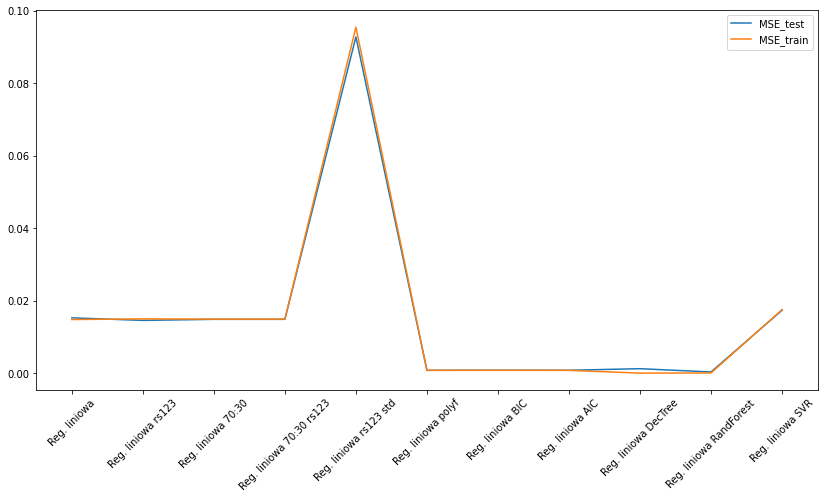

In [91]:
plt.figure(figsize=(14,7))
plt.plot(df_results_errors.MSE_test, label='MSE_test')
plt.plot(df_results_errors.MSE_train, label='MSE_train')
plt.xticks(rotation=45)
plt.legend()
plt.show()

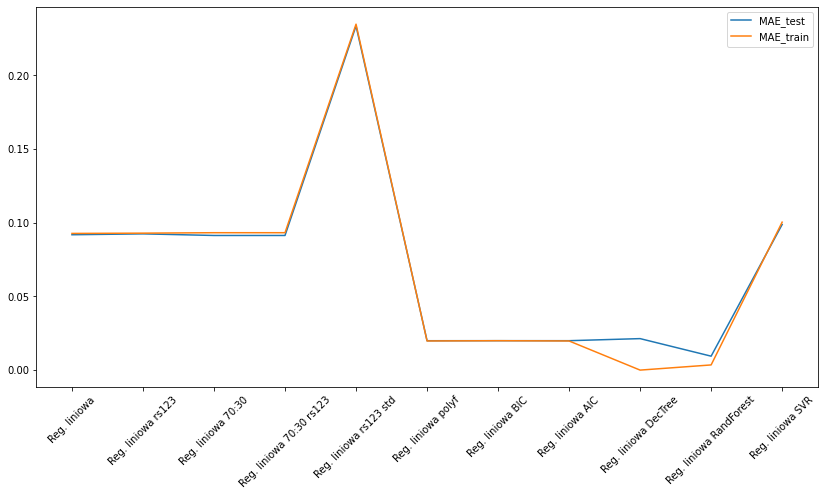

In [92]:
 plt.figure(figsize=(14,7))
plt.plot(df_results_errors.MAE_test, label='MAE_test')
plt.plot(df_results_errors.MAE_train, label='MAE_train')
plt.xticks(rotation=45)
plt.legend()
plt.show()

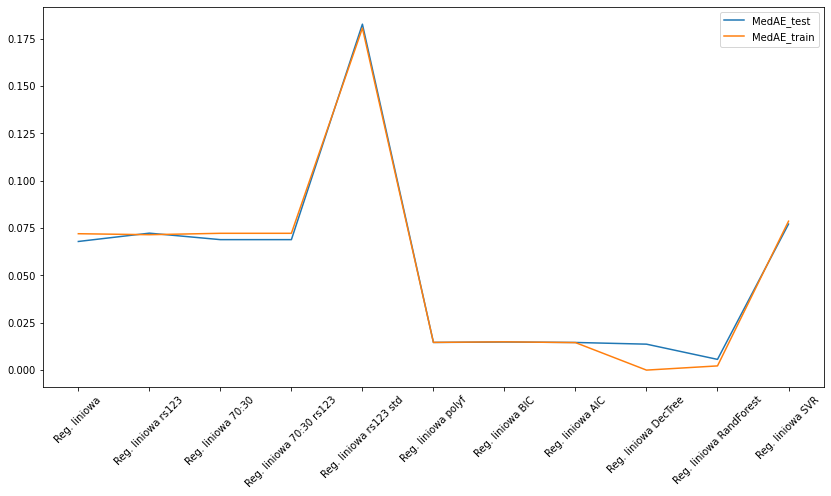

In [93]:
plt.figure(figsize=(14,7))
plt.plot(df_results_errors.MedAE_test, label='MedAE_test')
plt.plot(df_results_errors.MedAE_train, label='MedAE_train')
plt.xticks(rotation=45)
plt.legend()
plt.show()

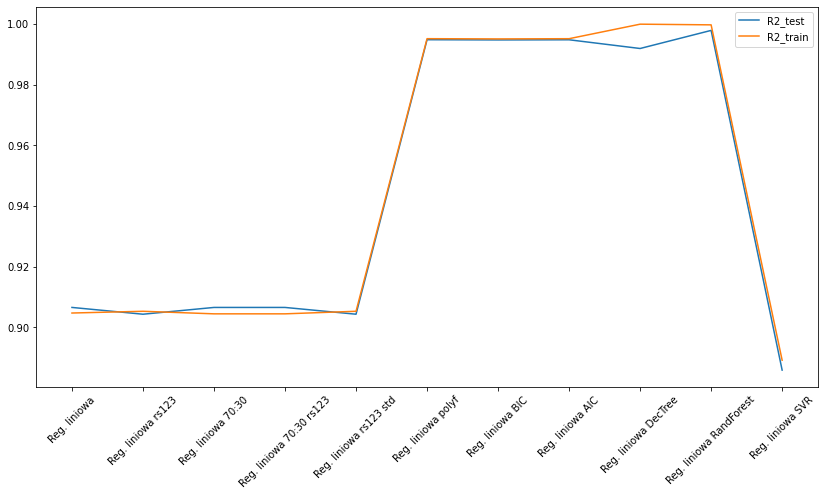

In [94]:
plt.figure(figsize=(14,7))
plt.plot(df_results_errors.r_score_test, label='R2_test')
plt.plot(df_results_errors.r_score_train, label='R2_train')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Konkluzje

Powyższe wykresy pozwalają nam zobaczyć, w jaki sposób zmieniają się wartości poszczególnych błędów i metryki ```R^2``` dla wybranych modeli regresyjnych. Widzimy z nich, że zastosowanie modelu wielomianowego oraz regulacji BIC i AIC najlepiej stabilizuje model oraz poprawia jego właściwości przewidujące. Gdybyśmy mieli wybierać, który z tych trzech modeli jest lepszy, musimy odpowiedzieć na pytanie, który z nich ma najmniej predyktorów i najlepiej przewiduje. W związku z tym, że wszystkie trzy mają taką samą predykcję, musimy sprawdzić, który z nich ma najmniej predyktorów. Najmniej predyktorów ma model z redukcją BIC - 48, następny jest model z redukcją AIC - 64 zmiennych, a najwięcej zmiennych ma model przekształcony wielomianowo - 77 zmiennych.

Widzimy, że zastosowanie do modelowania regresyjnych drzew decyzyjnych i lasów losowych (przy zastosowaniu danych z bazowego modelu ```Reg. liniowa rs123```) destabilizuje model, a zastosowanie maszyny wektorów nośnych (SVM) z kolei stabilizuje model, ale zmniejsza jego właściwości predykcyjne. Należałoby zbadać wpływ danych po modelowaniu wielomianowym i zastosowaniu redukcji BIC na ich wyniki.

Moglibyśmy ograniczyć się do zbadania i modelowania dla zmiennych ```T```, ```RH``` i ```AH``` ponieważ istnieje silna zależność między temperaturą, wilgotnością względną i wilgotnością bezwzględną. Możnaby na podstawie tych trzech zmiennych zbudować model przewiduący wilgotność względną ```RH``` na podstawie wilgotności bezwzględnej ```AH``` i temperatury ```T```.

Na podstawie danych użytych do modelowania możnaby także zbudować model przewidujący zaniczyszczenie powietrza na podstawie ilości gazów cieplarnianych, a także dokonać klasyfikacji jakości powietrza na podstawie zawartości tych gazów w powietrzu.